# ¿Cuál es la mejor tarifa?

El operador de telecomunicaciones Megaline quiere analizar sus tarifas. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Se realizará un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Se tendrán los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. El objetivo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Propósito del proyecto:**

El objetivo principal de este análisis es identificar cuál de las dos tarifas de prepago de Megaline, Surf o Ultimate, genera mayores ingresos. Con base en los resultados, el departamento comercial podrá optimizar el presupuesto de publicidad y enfocar los esfuerzos promocionales en la tarifa más rentable. Este análisis preliminar se centrará en una muestra representativa de 500 clientes, proporcionando información valiosa sobre el comportamiento de los consumidores y sus patrones de uso.

**Acciones planificadas:**

1. Preparación de los datos:

- Examinar las bases de datos para verificar la integridad y calidad de los datos. Esto incluye revisar si hay valores faltantes, duplicados, o posibles inconsistencias.
- Limpiar los datos, corrigiendo errores y cambiar tipo de datos.

2. Cálculo de ingresos por cliente:

- Determinar los ingresos generados por cada cliente en función de su consumo de llamadas y mensajes de texto, considerando los costos asociados a cada tarifa.

3. Análisis exploratorio de datos:

- Identificar tendencias y diferencias en el uso de las tarifas Surf y Ultimate, como la frecuencia de llamadas, cantidad de mensajes de texto enviados, y la distribución geográfica de los usuarios.
- Usar medidas estadísticas como la media, mediana, y desviación estándar para entender patrones de uso.
- Identificar clientes con consumo extremo (alto o bajo) que puedan influir en el ingreso total.

4. Visualización de datos:

- Crear gráficos como histogramas, gráficos de barras y diagramas de dispersión para comparar el uso entre las tarifas.

5. Interpretación y comparación:

- Realizar una comparación detallada de los ingresos totales generados por ambas tarifas para determinar cuál es más rentable.
- Realizar pruebas estadísticas para interpretar los resultados en base a las hipótesis planteadas.

6. Conclusiones y recomendaciones:

- Resumir los hallazgos clave del análisis, destacando cuál tarifa es más rentable y por qué.
- Proponer recomendaciones claras para el departamento comercial en términos de ajuste de presupuesto publicitario y estrategias promocionales.

## Inicialización

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from scipy import stats as st

## Cargar datos

In [ ]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

In [ ]:
print(df_calls.duplicated().sum())
print(df_internet.duplicated().sum())
print(df_messages.duplicated().sum())
print(df_plans.duplicated().sum())
print(df_users.duplicated().sum())

0
0
0
0
0


## Tarifas

In [ ]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
print(df_plans.head(10))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


No se muestran problemas, los tipos de datos son correctos, ya que los valores son de tipo numérico y el nombre del plan es un tipo de datos de texto.
No existen valores ausentes.
El cálculo del total de GB a MB es correcto, sin embargo, se agregó columna con el total de GB.
No hay valores numéricos en negativo.

### Corregir datos

### Enriquecer los datos

In [ ]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Usuarios/as

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
print(df_users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

El tipo de datos de *user_id* y *age* puede cambiarse a tipo *object* ya que no se requieren operaciones matemáticas para ese tipo de datos. Se debe cambiar el tipo de datos en las columnas *reg_date* y *churn_date* a tipo fecha.

Existen datos ausentes en la columna *churn_date*, estos se deben llenar con el valor máximo de la columna ya que la tarifa se estaba usando cuando fue extraída esta base de datos.

### Corregir los datos

In [ ]:
df_users['user_id'] = df_users['user_id'].astype(object)
df_users['age'] = df_users['age'].astype(object)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [ ]:
df_users['churn_date'].fillna(df_users['churn_date'].max(), inplace=True)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    object        
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 31.4+ KB


## Llamadas

In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
print(df_calls.head(10))

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40


El tipo de datos de *user_id* puede cambiarse a tipo *object* ya que no se requieren operaciones matemáticas para ese tipo de datos. Se debe cambiar el tipo de datos en la columna *call_date* a tipo fecha. No existen valores ausentes.

Se agregará columna con el mes correspondiente en el año para futuros análisis.

### Corregir los datos

In [ ]:
df_calls['user_id'] = df_calls['user_id'].astype(object)
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [ ]:
df_calls['month_year'] = df_calls['call_date'].dt.month

In [ ]:
print(df_calls[df_calls['duration']== 0])

              id user_id  call_date  duration  month_year
19        1001_4    1001 2018-12-05       0.0          12
25       1001_13    1001 2018-12-24       0.0          12
31       1001_30    1001 2018-10-17       0.0          10
32       1001_31    1001 2018-11-03       0.0          11
34       1001_35    1001 2018-12-21       0.0          12
...          ...     ...        ...       ...         ...
137714  1499_183    1499 2018-11-10       0.0          11
137715  1499_184    1499 2018-09-15       0.0           9
137720  1499_189    1499 2018-12-27       0.0          12
137722  1499_191    1499 2018-12-24       0.0          12
137725  1499_194    1499 2018-10-31       0.0          10

[26834 rows x 5 columns]


Las llamadas con duración *0* podrían ser intentos de llamada que no se completaron, ya sea porque el receptor no respondió, la línea estaba ocupada, o hubo algún problema técnico.

## Mensajes

In [ ]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
print(df_messages.head(10))

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


El tipo de datos de *user_id* puede cambiarse a tipo *object* ya que no se requieren operaciones matemáticas para ese tipo de datos. Se debe cambiar el tipo de datos en la columna *message_date* a tipo fecha. No existen valores ausentes.

Se agregará columna con el mes correspondiente en el año para futuros análisis.

### Corregir los datos

In [ ]:
df_messages['user_id'] = df_messages['user_id'].astype(object)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [ ]:
df_messages['month_year'] = df_messages['message_date'].dt.month

## Internet

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
print(df_internet.head(10))

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


El tipo de datos de *user_id* puede cambiarse a tipo *object* ya que no se requieren operaciones matemáticas para ese tipo de datos. Se debe cambiar el tipo de datos en la columna *session_date* a tipo fecha. No existen valores ausentes.

Se agregará columna con el mes correspondiente en el año para futuros análisis.

### Corregir los datos

In [ ]:
df_internet['user_id'] = df_internet['user_id'].astype(object)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [ ]:
df_internet['month_year'] = df_internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

## Agregar datos por usuario

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
total_calls_by_id = df_calls.groupby(['user_id', 'month_year'])['id'].count()
print(total_calls_by_id)

user_id  month_year
1000     12            16
1001     8             27
         9             49
         10            65
         11            64
                       ..
1498     12            39
1499     9             41
         10            53
         11            45
         12            65
Name: id, Length: 2258, dtype: int64


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
total_minutes_by_id = df_calls.groupby(['user_id', 'month_year'])['duration'].sum()
print(total_minutes_by_id)

user_id  month_year
1000     12            116.83
1001     8             171.14
         9             297.69
         10            374.11
         11            404.59
                        ...  
1498     12            324.77
1499     9             330.37
         10            363.28
         11            288.56
         12            468.10
Name: duration, Length: 2258, dtype: float64


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
total_messages_by_id = df_messages.groupby(['user_id', 'month_year'])['id'].count()
print(total_messages_by_id)

user_id  month_year
1000     12            11
1001     8             30
         9             44
         10            53
         11            36
                       ..
1496     9             21
         10            18
         11            13
         12            11
1497     12            50
Name: id, Length: 1806, dtype: int64


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
total_internet_by_id = df_internet.groupby(['user_id', 'month_year'])['mb_used'].sum()
print(total_internet_by_id)

user_id  month_year
1000     12             1901.47
1001     8              6919.15
         9             13314.82
         10            22330.49
         11            18504.30
                         ...   
1498     12            23137.69
1499     9             12984.76
         10            19492.43
         11            16813.83
         12            22059.21
Name: mb_used, Length: 2277, dtype: float64


In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merge_data = total_calls_by_id.to_frame().merge(total_minutes_by_id, on=['user_id', 'month_year'], how='outer')
merge_data = merge_data.merge(total_messages_by_id, on=['user_id', 'month_year'], how='outer')
merge_data = merge_data.merge(total_internet_by_id, on=['user_id', 'month_year'], how='outer')
merge_data.columns = ['total_calls', 'total_minutes', 'total_messages', 'total_mb_used']
merge_data = merge_data.reset_index()
print(merge_data)

      user_id  month_year  total_calls  total_minutes  total_messages  \
0        1000          12         16.0         116.83            11.0   
1        1001           8         27.0         171.14            30.0   
2        1001           9         49.0         297.69            44.0   
3        1001          10         65.0         374.11            53.0   
4        1001          11         64.0         404.59            36.0   
...       ...         ...          ...            ...             ...   
2288     1349          12          NaN            NaN            61.0   
2289     1361           5          NaN            NaN             2.0   
2290     1482          10          NaN            NaN             2.0   
2291     1108          12          NaN            NaN             NaN   
2292     1311           6          NaN            NaN             NaN   

      total_mb_used  
0           1901.47  
1           6919.15  
2          13314.82  
3          22330.49  
4          18

In [ ]:
# Añade la información de la tarifa
merge_data = merge_data.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
print(merge_data)

     user_id  month_year  total_calls  total_minutes  total_messages  \
0       1000          12         16.0         116.83            11.0   
1       1001           8         27.0         171.14            30.0   
2       1001           9         49.0         297.69            44.0   
3       1001          10         65.0         374.11            53.0   
4       1001          11         64.0         404.59            36.0   
...      ...         ...          ...            ...             ...   
2288    1349          12          NaN            NaN            61.0   
2289    1361           5          NaN            NaN             2.0   
2290    1482          10          NaN            NaN             2.0   
2291    1108          12          NaN            NaN             NaN   
2292    1311           6          NaN            NaN             NaN   

      total_mb_used      plan  
0           1901.47  ultimate  
1           6919.15      surf  
2          13314.82      surf  
3      

In [ ]:
# Añadir las condiciones de tarifas en función del plan

def add_tariff_details(row):
    if row['plan'] == 'surf':
        return pd.Series({
            'monthly_fee': 20,
            'free_minutes': 500,
            'free_sms': 50,
            'free_gb': 15,
            'extra_minute_cost': 0.03,
            'extra_sms_cost': 0.03,
            'extra_gb_cost': 10})
    else:
        return pd.Series({
            'monthly_fee': 70,
            'free_minutes': 3000,
            'free_sms': 1000,
            'free_gb': 30,
            'extra_minute_cost': 0.01,
            'extra_sms_cost': 0.01,
            'extra_gb_cost': 7})

tariff_details = merge_data.apply(add_tariff_details, axis=1)
merge_data = pd.concat([merge_data, tariff_details], axis=1)
merge_data = merge_data.fillna(0)
print(merge_data)

      user_id  month_year  total_calls  total_minutes  total_messages  \
0        1000          12         16.0         116.83            11.0   
1        1001           8         27.0         171.14            30.0   
2        1001           9         49.0         297.69            44.0   
3        1001          10         65.0         374.11            53.0   
4        1001          11         64.0         404.59            36.0   
...       ...         ...          ...            ...             ...   
2288     1349          12          0.0           0.00            61.0   
2289     1361           5          0.0           0.00             2.0   
2290     1482          10          0.0           0.00             2.0   
2291     1108          12          0.0           0.00             0.0   
2292     1311           6          0.0           0.00             0.0   

      total_mb_used      plan  monthly_fee  free_minutes  free_sms  free_gb  \
0           1901.47  ultimate         70.0  

In [ ]:
# Calcular el ingreso mensual para cada usuario
def calculate_monthly_revenue(row):
    # Detalles del plan
    free_minutes = row['free_minutes']
    free_sms = row['free_sms']
    free_gb = row['free_gb']
    extra_minute_cost = row['extra_minute_cost']
    extra_sms_cost = row['extra_sms_cost']
    extra_gb_cost = row['extra_gb_cost']
    monthly_fee = row['monthly_fee']

    # Fusionar con df_calls para obtener las duraciones individuales de llamadas
    user_id = row['user_id']
    user_calls = df_calls[df_calls['user_id'] == user_id]

    # Redondear cada llamada individual al siguiente minuto y luego sumar
    total_minutes = sum(math.ceil(duration) for duration in user_calls['duration'])

    # Valores de uso mensual del usuario
    total_sms = row['total_messages'] if row['total_messages'] else 0
    total_gb = math.ceil(row['total_mb_used'] / 1024) if row['total_mb_used'] else 0

    # Calcular excedentes
    extra_minutes = max(0, total_minutes - free_minutes)
    extra_sms = max(0, total_sms - free_sms)
    extra_gb = max(0, total_gb - free_gb)

    # Calcular costos adicionales por excedentes
    extra_revenue = (extra_minutes * extra_minute_cost +
        extra_sms * extra_sms_cost +
        extra_gb * extra_gb_cost)

    # Ingreso total: tarifa mensual + ingresos por excedentes
    total_revenue = monthly_fee + extra_revenue

    return total_revenue

merge_data['monthly_revenue'] = merge_data.apply(calculate_monthly_revenue, axis=1)
print(merge_data[['user_id', 'month_year', 'plan', 'monthly_revenue']])

      user_id  month_year      plan  monthly_revenue
0        1000          12  ultimate            70.00
1        1001           8      surf            56.84
2        1001           9      surf            56.84
3        1001          10      surf           126.93
4        1001          11      surf            96.84
...       ...         ...       ...              ...
2288     1349          12      surf            20.33
2289     1361           5      surf            88.67
2290     1482          10  ultimate            70.00
2291     1108          12  ultimate            70.00
2292     1311           6  ultimate            70.00

[2293 rows x 4 columns]


## Estudiar el comportamiento de usuario

### Llamadas

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = merge_data.pivot_table(index='month_year',
                                           columns='plan',
                                           values='total_minutes',
                                           aggfunc='mean')
avg_call_duration= avg_call_duration.rename({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})
print(avg_call_duration)

plan              surf    ultimate
month_year                        
Enero       192.840000  183.162500
Febrero     280.851111  379.861429
Marzo       310.970000  285.701667
Abril       332.380000  316.508095
Mayo        377.053247  383.664828
Junio       407.208866  349.811064
Julio       424.523223  403.767288
Agosto      387.169630  397.274789
Septiembre  390.992062  413.287326
Octubre     405.692363  425.168019
Noviembre   399.599823  420.477559
Diciembre   447.475283  433.012583


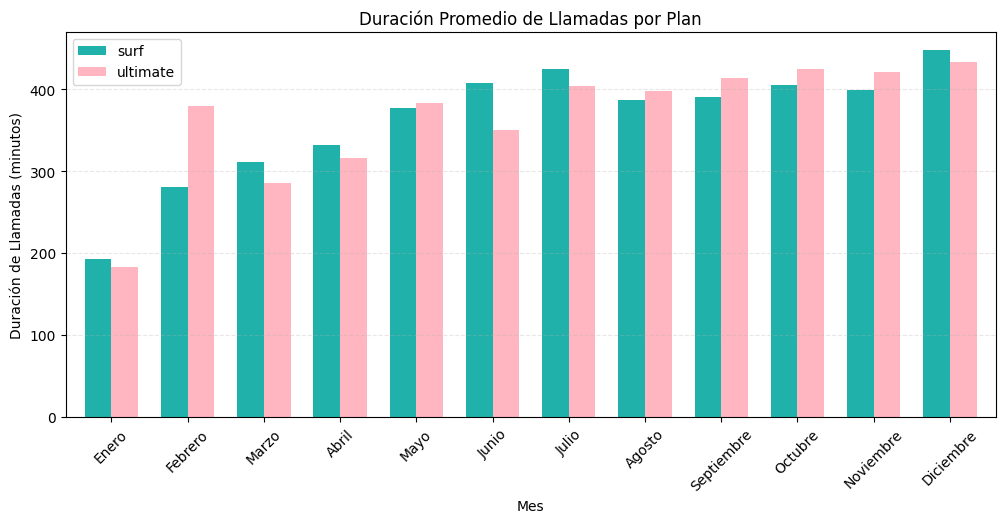

In [ ]:
colors=['lightseagreen','lightpink']
avg_call_duration.plot(y=['surf', 'ultimate'],
                       title='Duración Promedio de Llamadas por Plan',
                       xlabel='Mes',
                       ylabel='Duración de Llamadas (minutos)',
                       kind='bar',
                       width=.70,
                       rot=45,
                       figsize=(12,5),
                       color=colors)
plt.legend(['surf', 'ultimate'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

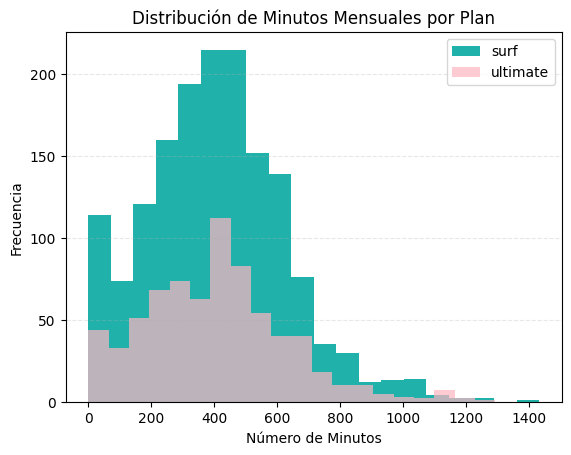

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
merge_data[merge_data['plan'] == 'surf']['total_minutes'].plot(kind='hist', bins=20, color='lightseagreen')
merge_data[merge_data['plan'] == 'ultimate']['total_minutes'].plot(kind='hist', bins=20, color='lightpink', alpha=0.7)
plt.legend(['surf', 'ultimate'])
plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Número de Minutos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
monthly_stats = merge_data.groupby('month_year')['total_minutes'].agg(['mean', 'var'])
new_index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
monthly_stats.index = new_index
monthly_stats.columns = ['mean_call_minutes', 'variance_minutes']
print(monthly_stats)

            mean_call_minutes  variance_minutes
Enero              186.388333      11978.884417
Febrero            324.168125      55034.331430
Marzo              302.306571      38297.559553
Abril              327.685493      40857.825162
Mayo               378.862075      49052.952900
Junio              388.474861      40290.973822
Julio              417.719889      57598.688315
Agosto             390.248884      48145.862318
Septiembre         397.839893      44405.688995
Octubre            411.711079      47179.463884
Noviembre          406.066829      48599.640860
Diciembre          442.818849      56522.142408


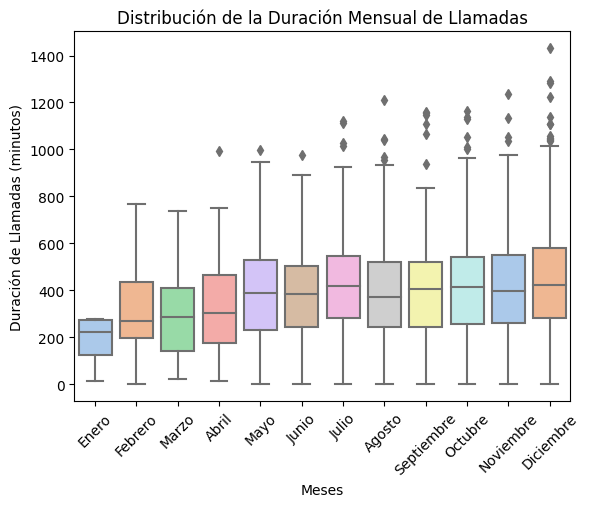

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=merge_data,
            x='month_year',
            y='total_minutes',
            palette='pastel')
plt.title('Distribución de la Duración Mensual de Llamadas')
plt.xlabel('Meses')
plt.ylabel('Duración de Llamadas (minutos)')
plt.xticks(ticks=range(0, 12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xticks(rotation=45)
plt.show()

Las gráficas reflejan tendencias importantes en el uso de llamadas para los planes "surf" y "ultimate". En general, el plan "ultimate" muestra una duración promedio de llamadas más alta y consistente durante el año, destacándose como una opción atractiva para usuarios con mayores necesidades de comunicación por llamada. En contraste, los usuarios del plan "surf" tienden a realizar llamadas más cortas, aunque presentan un aumento gradual en la duración promedio hacia finales del año, alcanzando un pico en diciembre. Además, los meses de verano (julio a septiembre) y finales de año muestran una mayor dispersión en la duración de las llamadas en ambos planes, con la presencia de valores atípicos que indican ocasiones puntuales de uso intensivo. Estos patrones sugieren que la estacionalidad, las promociones o eventos específicos podrían influir en los hábitos de comunicación de los usuarios.

### Mensajes

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_by_month = merge_data.pivot_table(index='month_year',
                                           columns='plan',
                                           values='total_messages',
                                           aggfunc='sum')
messages_by_month = messages_by_month.rename({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})
print(messages_by_month)

plan           surf  ultimate
month_year                   
Enero          21.0      62.0
Febrero       108.0     151.0
Marzo         351.0     243.0
Abril         870.0     463.0
Mayo         1849.0     931.0
Junio        2454.0    1379.0
Julio        3271.0    1937.0
Agosto       4662.0    2732.0
Septiembre   5968.0    3259.0
Octubre      8020.0    4181.0
Noviembre    9165.0    4903.0
Diciembre   12275.0    6796.0


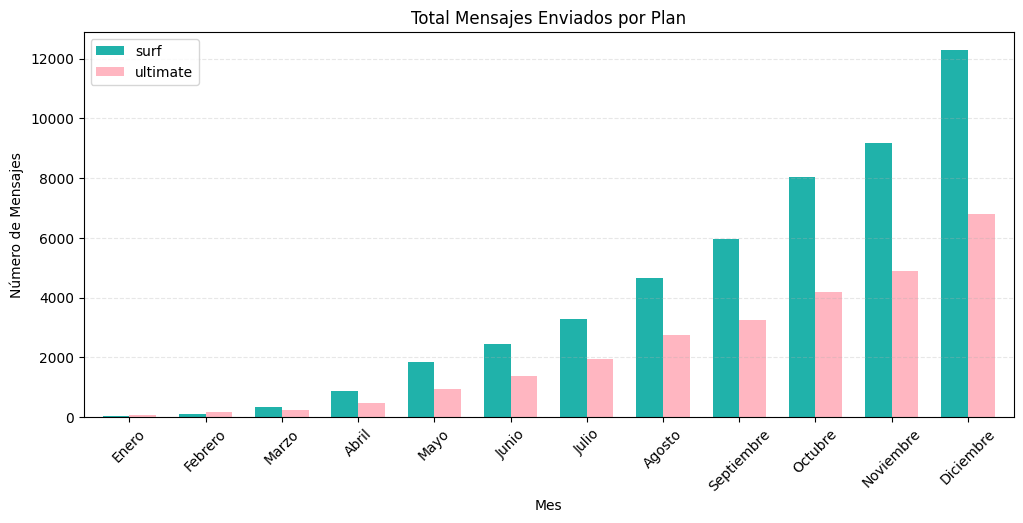

In [ ]:
colors=['lightseagreen','lightpink']
messages_by_month.plot(y=['surf', 'ultimate'],
                       title='Total Mensajes Enviados por Plan',
                       xlabel='Mes',
                       ylabel='Número de Mensajes',
                       kind='bar',
                       width=.70,
                       rot=45,
                       figsize=(12,5),
                       color=colors)
plt.legend(['surf', 'ultimate'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

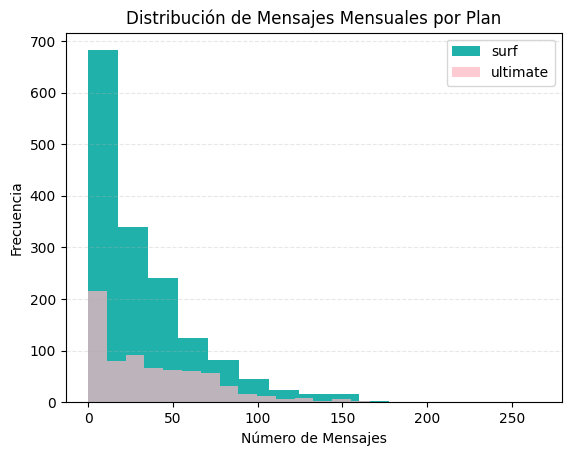

In [ ]:
merge_data[merge_data['plan'] == 'surf']['total_messages'].plot(kind='hist', bins=15, color='lightseagreen')
merge_data[merge_data['plan'] == 'ultimate']['total_messages'].plot(kind='hist', bins=15, color='lightpink', alpha=0.7)
plt.legend(['surf', 'ultimate'])
plt.title('Distribución de Mensajes Mensuales por Plan')
plt.xlabel('Número de Mensajes')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

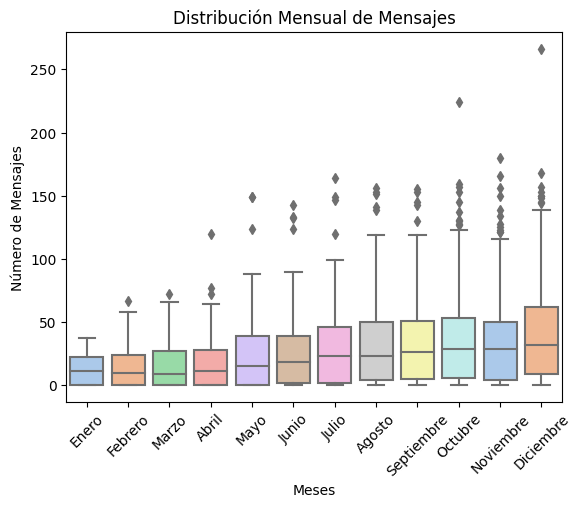

In [ ]:
sns.boxplot(data=merge_data,
            x='month_year',
            y='total_messages',
            palette='pastel')
plt.title('Distribución Mensual de Mensajes')
plt.xlabel('Meses')
plt.ylabel('Número de Mensajes')
plt.xticks(ticks=range(0, 12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xticks(rotation=45)
plt.show()

La distribución de mensajes mensuales entre los usuarios de los planes "surf" y "ultimate" revela varias tendencias importantes. La mayoría de los usuarios de ambos planes envían pocos mensajes mensuales, concentrándose principalmente entre 0 y 50 mensajes, con una frecuencia más notable en el plan "surf". A lo largo del año, se observa un incremento en el uso de mensajes, particularmente en el plan "surf", que alcanza su pico máximo en diciembre con más de 12,000 mensajes, mientras que el plan "ultimate" registra un incremento más moderado, con un máximo de alrededor de 8,000 mensajes. Esta tendencia puede estar influenciada por factores como estacionalidad, promociones o características más atractivas del plan "surf". Además, durante los meses de septiembre a diciembre, se observa una mayor dispersión en los datos, acompañada de valores atípicos que sugieren un uso inusualmente alto del servicio en ciertas ocasiones, lo que refuerza la idea de un aumento estacional hacia finales del año.

### Internet

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
avg_mb_used = merge_data.pivot_table(index='month_year',
                                    columns='plan',
                                    values='total_mb_used',
                                    aggfunc='mean')
avg_mb_used = avg_mb_used.rename({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})
print(avg_mb_used)

plan                surf      ultimate
month_year                            
Enero        4874.860000   6918.092500
Febrero     12178.843333  17128.808571
Marzo       13345.440000  18321.518333
Abril       11984.203000  16121.654762
Mayo        13936.354935  16624.482414
Junio       15301.529175  15337.921064
Julio       16783.600579  16344.744407
Agosto      16795.331358  17814.720141
Septiembre  16591.431289  16969.869535
Octubre     17311.335063  17612.553396
Noviembre   16339.254417  17033.685354
Diciembre   18132.469371  18323.191854


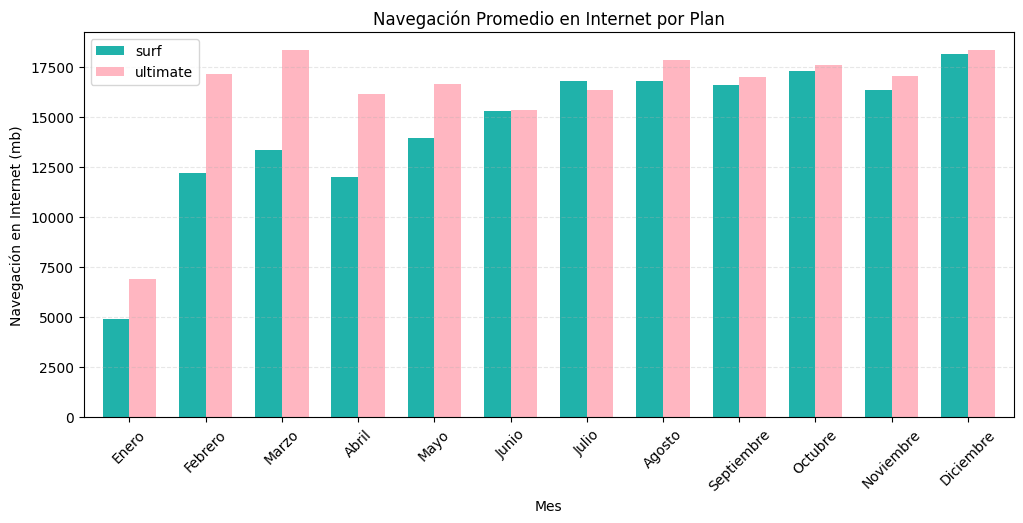

In [ ]:
colors=['lightseagreen','lightpink']
avg_mb_used.plot(y=['surf', 'ultimate'],
                 title='Navegación Promedio en Internet por Plan',
                 xlabel='Mes',
                 ylabel='Navegación en Internet (mb)',
                 kind='bar',
                 width=.70,
                 rot=45,
                 figsize=(12,5),
                 color=colors)
plt.legend(['surf', 'ultimate'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

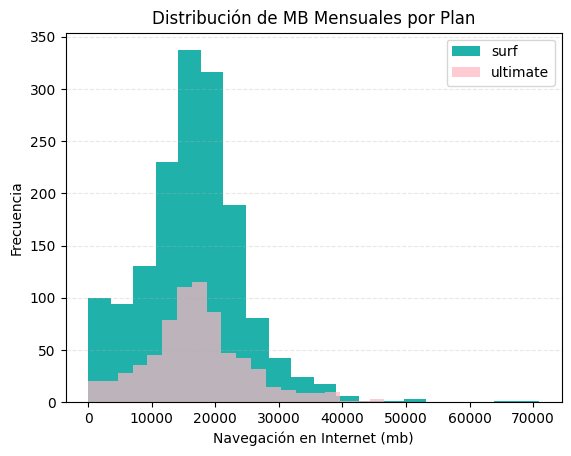

In [ ]:
merge_data[merge_data['plan'] == 'surf']['total_mb_used'].plot(kind='hist', bins=20, color='lightseagreen')
merge_data[merge_data['plan'] == 'ultimate']['total_mb_used'].plot(kind='hist', bins=20, color='lightpink', alpha=0.7)
plt.legend(['surf', 'ultimate'])
plt.title('Distribución de MB Mensuales por Plan')
plt.xlabel('Navegación en Internet (mb)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

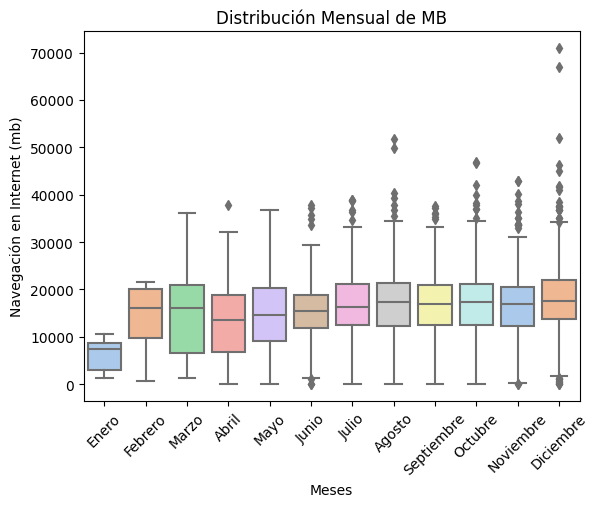

In [ ]:
sns.boxplot(data=merge_data,
            x='month_year',
            y='total_mb_used',
            palette='pastel')
plt.title('Distribución Mensual de MB')
plt.xlabel('Meses')
plt.ylabel('Navegación en Internet (mb)')
plt.xticks(ticks=range(0, 12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xticks(rotation=45)
plt.show()

El consumo de datos mensuales muestra patrones variados y diferencias marcadas entre los planes "surf" y "ultimate". Los usuarios del plan "surf" tienen una frecuencia más alta en el rango moderado de uso de datos, concentrándose entre los 10,000 y 20,000 MB, mientras que el plan "ultimate" presenta una mayor dispersión, incluyendo usuarios con consumos significativamente más altos. A lo largo del año, los meses de marzo, abril y mayo destacan por un aumento en el uso promedio de datos, especialmente en el plan "ultimate", que alcanza su punto máximo en marzo. Este patrón podría indicar necesidades de navegación más altas durante estos meses debido a factores específicos como promociones o eventos. Además, los valores atípicos presentes en casi todos los meses reflejan que algunos usuarios tienen un consumo excepcionalmente alto, posiblemente ligado a necesidades específicas. Hacia finales de año, en diciembre, el consumo promedio incrementa en ambos planes, lo que podría estar asociado con la estacionalidad y un mayor uso en esta época.

## Ingreso

In [ ]:
surf_plan = merge_data[merge_data['plan'] == 'surf']
ultimate_plan = merge_data[merge_data['plan'] == 'ultimate']

In [ ]:
def calcular_estadisticas(dataframe, plan_name):
    print(f"\nEstadísticas del plan {plan_name}:")
    print(f"Media: {dataframe['monthly_revenue'].mean():.2f}")
    print(f"Mediana: {dataframe['monthly_revenue'].median():.2f}")
    print(f"Desviación estándar: {dataframe['monthly_revenue'].std():.2f}")
    print(f"Varianza: {dataframe['monthly_revenue'].var():.2f}")
    print(f"Mínimo: {dataframe['monthly_revenue'].min():.2f}")
    print(f"Máximo: {dataframe['monthly_revenue'].max():.2f}")
    print(f"Percentil 25: {dataframe['monthly_revenue'].quantile(0.25):.2f}")
    print(f"Percentil 75: {dataframe['monthly_revenue'].quantile(0.75):.2f}")

In [ ]:
calcular_estadisticas(surf_plan, 'surf')
calcular_estadisticas(ultimate_plan, 'ultimate')


Estadísticas del plan surf:
Media: 130.77
Mediana: 120.69
Desviación estándar: 80.03
Varianza: 6405.12
Mínimo: 20.00
Máximo: 598.14
Percentil 25: 69.20
Percentil 75: 172.66

Estadísticas del plan ultimate:
Media: 78.94
Mediana: 70.00
Desviación estándar: 16.23
Varianza: 263.37
Mínimo: 70.00
Máximo: 182.00
Percentil 25: 70.00
Percentil 75: 82.34


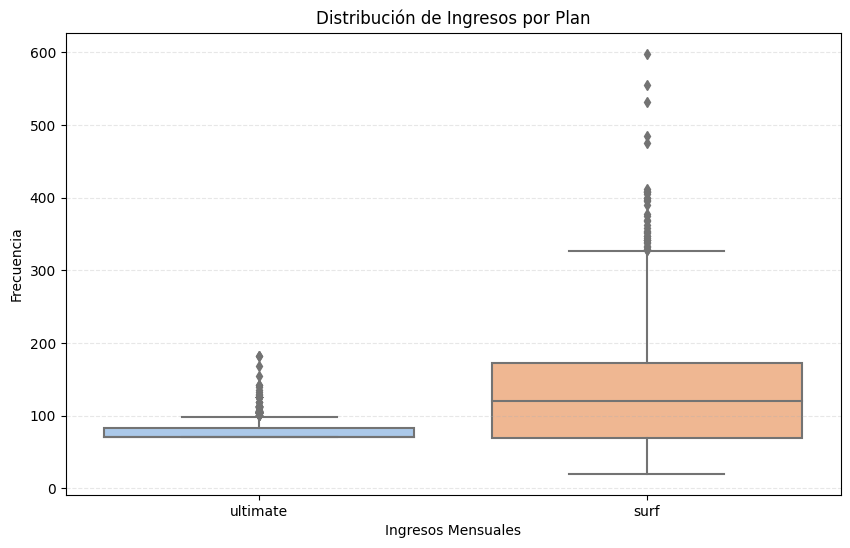

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merge_data,
            x='plan',
            y='monthly_revenue',
            palette='pastel')
plt.title('Distribución de Ingresos por Plan')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Los ingresos mensuales de los planes reflejan diferencias claras en los patrones de generación de ingresos. El plan "surf" tiene una media de ingresos mensual de 130.77, mostrando una mayor variabilidad en los ingresos, como lo indica su desviación estándar de 80.03 y un máximo de 598.14 lo que indica la presencia de usuarios con ingresos excepcionales dentro de este plan.

Por otro lado, el plan "ultimate" presenta una media de 78.94, y una distribución notablemente más estable y concentrada. Esto queda reflejado en una desviación estándar baja de 16.23, con ingresos agrupados principalmente en torno a los 70.00, siendo este valor tanto su mediana como su percentil 25. Aunque algunos ingresos llegan hasta 182.00, el rango es más limitado, indicando una base de usuarios que generan ingresos de manera consistente dentro de un margen estrecho.

En resumen, el plan "surf" atrae a una mayor variedad de usuarios con ingresos dispersos, mientras que el plan "ultimate" se caracteriza por una base más estable y concentrada de usuarios con ingresos uniformes. Esto podría orientar estrategias diferenciadas para maximizar el potencial de cada plan.

## Prueba las hipótesis estadísticas

**Hipótesis**

**1. Hipótesis nula (H₀):** No existe una diferencia significativa entre los ingresos promedio de los planes "surf" y "ultimate".

**2. Hipótesis alternativa (H₁):** Existe una diferencia significativa entre los ingresos promedio de los planes "surf" y "ultimate".

In [ ]:
# Prueba las hipótesis
surf_revenue = surf_plan['monthly_revenue']
ultimate_revenue = ultimate_plan['monthly_revenue']

p_value_ttest = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print('Valor p:', p_value_ttest.pvalue)

if p_value_ttest.pvalue < 0.05:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


Valor p: 9.025308276706566e-116
Rechazamos la hipótesis nula


**Hipótesis**

**1. Hipótesis nula (H₀):** El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.

**2. Hipótesis alternativa (H₁):** El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.

In [ ]:
# Prueba las hipótesis
merge_data = merge_data.merge(df_users, on=['user_id'], how='outer')
ny_nj_revenue = merge_data[merge_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
other_regions_revenue = merge_data[merge_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

print(ny_nj_revenue.isna().sum())
print(other_regions_revenue.isna().sum())

1
9


In [ ]:
ny_nj_revenue = ny_nj_revenue.fillna(0)
other_regions_revenue = other_regions_revenue.fillna(0)
print(ny_nj_revenue.isna().sum())
print(other_regions_revenue.isna().sum())

0
0


In [ ]:
print(ny_nj_revenue.describe())
print(other_regions_revenue.describe())

count    378.000000
mean     124.992937
std       60.499175
min        0.000000
25%       70.000000
50%      124.595000
75%      164.772500
max      354.630000
Name: monthly_revenue, dtype: float64
count    1925.000000
mean      111.837351
std        73.100533
min         0.000000
25%        70.000000
50%        85.220000
75%       145.430000
max       598.140000
Name: monthly_revenue, dtype: float64


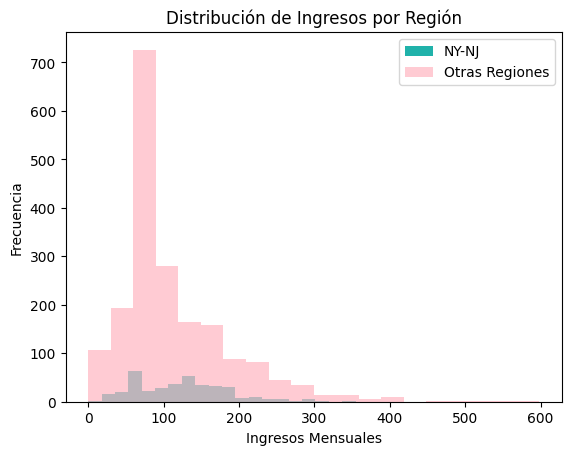

In [ ]:
plt.hist(ny_nj_revenue, bins=20, label='NY-NJ', color='lightseagreen')
plt.hist(other_regions_revenue, bins=20, alpha=0.7, label='Otras Regiones', color='lightpink')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de Ingresos por Región')
plt.show()

In [ ]:
p_value_ttest = st.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)
print('Valor p:', p_value_ttest.pvalue)

if p_value_ttest.pvalue < 0.05:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.00021157920600590845
Rechazamos la hipótesis nula


Tras realizar la prueba t para muestras independientes entre los ingresos promedio de los usuarios del área NY-NJ y los de otras regiones, se obtuvo un valor p 0.00021157920600590525 como resultado.

Dado que el valor p es menor que el nivel de significación, rechazamos la hipótesis nula (H₀). Esto indica que existe una diferencia estadísticamente significativa entre el ingreso promedio de los usuarios del área NY-NJ y el de los usuarios de otras regiones. Por lo tanto, se acepta la hipótesis alternativa (H₁): el ingreso promedio entre ambas regiones es diferente.

## Conclusión general

1. Análisis de la duración de las llamadas:

La duración promedio de las llamadas mostró un aumento progresivo a lo largo del año, con picos destacados durante los meses de verano (julio, agosto y septiembre) y a finales del año (diciembre)

Los valores atípicos registrados reflejan que algunos usuarios tuvieron patrones de uso significativamente más altos en estas épocas, posiblemente debido a eventos estacionales o promociones específicas

Los planes mostraron diferencias en el comportamiento: el plan "surf" se asoció con usuarios que realizan llamadas más cortas, mientras que el plan "ultimate" atrajo a quienes realizan llamadas de mayor duración promedio, aunque con menor cantidad de usuarios.

2. Análisis del consumo de datos:

En general, el consumo promedio de datos de Internet fue significativamente mayor en los usuarios del plan "ultimate" en comparación con los del plan "surf".

Los meses de marzo y agosto mostraron picos de consumo en ambos planes, indicando una estacionalidad en el uso de datos, posiblemente ligada a actividades específicas durante esas épocas

Los usuarios del plan "surf" se concentraron en un rango moderado de consumo de 10,000 a 20,000 MB, mientras que los usuarios del plan "ultimate" tuvieron un rango más amplio, incluyendo valores altos que superaron los 50,000 MB mensuales.

3. Análisis de los ingresos por plan:

El ingreso promedio del plan "surf" fue 130.77, con una alta dispersión reflejada en su desviación estándar de 80.03. Esto sugiere una amplia variedad de patrones de uso y niveles de gasto entre los usuarios.

En contraste, el ingreso promedio del plan "ultimate" fue más estable con una media de 78.94 y con una desviación estándar de 16.23. Los ingresos de este plan se concentraron principalmente en torno a su mediana de 70.00, lo que refleja un comportamiento más homogéneo entre los usuarios.

4. Conclusiones generales:

Los patrones de uso y consumo de los usuarios están significativamente influenciados por el tipo de plan y factores estacionales.

El plan "ultimate" genera ingresos más altos y consistentes, atendiendo a usuarios con necesidades más intensivas, mientras que el plan "surf" tiene una base de usuarios más diversa pero con ingresos menos predecibles.

Recomendaciones:

- Optimizar estrategias de marketing para aprovechar los patrones estacionales de consumo observados.
- Considerar la creación de planes personalizados que combinen características del plan "surf" y "ultimate" para maximizar ingresos y satisfacción de los usuarios.